# Unsupervised Learning - Mall Customer Segmentation
Created by: TK Wong

## Abstract
Source of data: Kaggle<br>
Database from [https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)<p>
    
Use this dataset for the purpose of learning customer segmentation concept by using unsupervised learning. <br>
Data contain **customerID**, **gender**, **age**, **annual income** and **spending score**. Spending score range between 0-100, based on defined customer behavior and purchasing data which is not include in this dataset. Owner of the mall want to understand the customers and who can be easily converge target customers so that they can be given to marketing team and plan the startegy accordingly.<br>

As for data clearning, **customerID** will be remove becuase it is not useful for unsupervised learning models. **gender** will be encode to 0 and 1 using <mark>LabelEncoder</mark>. After data ckearning, new variable _mall_data_norm_ data will be create and store normalized data from _mall_data_ using <mark>MinMaxScaler</mark>.<br>

Next step, Elbow and Silhouette score method used to find optimal number of cluster for both original and normalized data. Next step, Elbow and Silhouette score method used to find optimal number of clusters for both original and normalized data. KMeans scatter plot generated based on the method. Which is
- Annual income vs Spending score
- Age vs Annual income
- Age vs Spending score
- Normalized Annual income vs Spending score
- Normalized Age vs Annual income
- Normalized Age vs Spending score
<br>

**Age** vs **Spending score** would work the best in this case because, age of a customer is easier to collect and could even use a machine learning model to collect.

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

In [161]:
# import data
mall_data = pd.read_csv('Mall_Customers.csv')

In [162]:
# display first 5 rows
mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [163]:
features=['Age','Spending Score (1-100)','Annual Income (k$)']

Dateset
- CustomerID : Unique ID assigned to the customer
- Gender : Gender of the customer, will use label encoder represent 1 = Male, 2 = Female in later stage
- Age : Age of the customer
- Annual Income (k$) : Annual Income of the customer
- Spending Score (1-1000) : Score assigned by the mall based on customer behavior and spending nature


Data file contain 5 column, customerID is not relevant to this case and will be remove.

In [164]:
# datatypes of the dataset
mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


It show there are not missing data in dataset. Data type include integer and object.

## Data Cleaning <a class="anchor" id="Data-Cleaning"></a>

In [165]:
# Remove customer id becuase it is not useful for unsupervised learning models
mall_data.drop('CustomerID', axis = 1, inplace=True)
mall_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [166]:
# statistics of columns in the dataset
mall_data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


Above statistcs show aveage age of customers is 39, average annual income is 60,560 and average spending score is 50.2. 

In [167]:
# Use label encoder for gender
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
mall_data_le = mall_data.copy()

mall_data_le['Gender'] = le.fit_transform(mall_data_le['Gender'])

# show encoder output
print('Transformation')
print(mall_data_le['Gender'].unique(), '=', le.inverse_transform(mall_data_le['Gender'].unique()))

Transformation
[1 0] = ['Male' 'Female']


## Normailzed data

In [168]:
from sklearn.preprocessing import MinMaxScaler
min_max_s = MinMaxScaler()

# Encoding
mall_data_norm = mall_data_le.copy()

# Normalization
mall_data_norm['Age'] = min_max_s.fit_transform(mall_data_norm[['Age']])
mall_data_norm['Annual Income (k$)'] = min_max_s.fit_transform(mall_data_norm[['Annual Income (k$)']])
mall_data_norm['Spending Score (1-100)'] = min_max_s.fit_transform(mall_data_norm[['Spending Score (1-100)']])

In [169]:
# check the normailed output
mall_data_norm

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0.019231,0.000000,0.387755
1,1,0.057692,0.000000,0.816327
2,0,0.038462,0.008197,0.051020
3,0,0.096154,0.008197,0.775510
4,0,0.250000,0.016393,0.397959
...,...,...,...,...
195,0,0.326923,0.860656,0.795918
196,0,0.519231,0.909836,0.275510
197,1,0.269231,0.909836,0.744898
198,1,0.269231,1.000000,0.173469


## Analysis and Visualization
### Original data

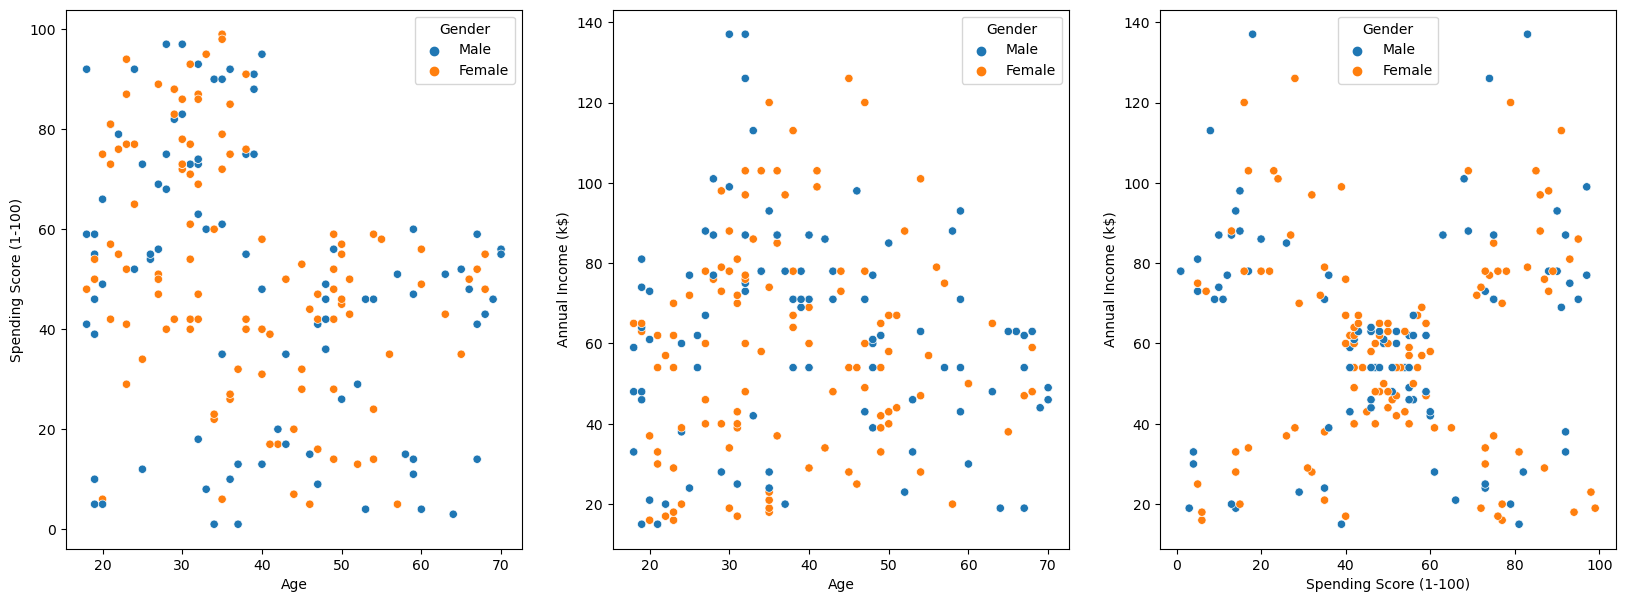

In [170]:
# plot original data
tol_num = 0
fig,axes=plt.subplots(1, 3, figsize=(20, 7))
for i in range(len(features)):
    for j in range(i+1, len(features)):
        sb.scatterplot(data = mall_data, x = features[i], y = features[j], ax = axes[tol_num], hue = "Gender")
        tol_num += 1
plt.show()

#####  Left
**Age** vs **Spending Score** can show young age tend to have higher spending score than age above 40.

##### Middle
**Age** vs **Annual Income** plot show most of the data points are below 100k per year and spread evenly arcoss all age. 

##### Rigth
Above **Annual Income** vs **Spending Score** plot show there might be 5 cluster group.<br>
(1) Low income, low spending score<br>
(2) Low income,  high spending<br>
(3) Middle income, middle spending<br>
(4) High income, low spending<br>
(5) High income, high spending

### Normalized data

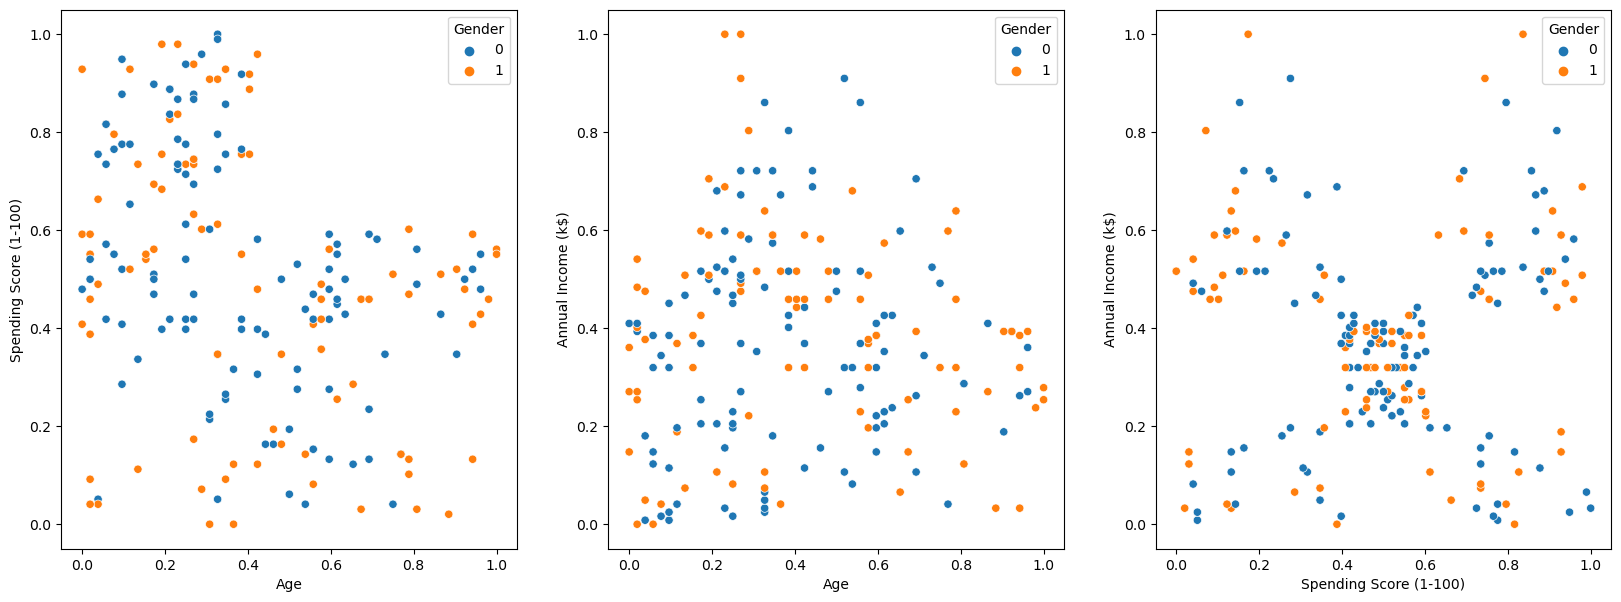

In [171]:
# plot normalized data
tol_num = 0
fig,axes=plt.subplots(1, 3, figsize=(20, 7))
for i in range(len(features)):
    for j in range(i+1, len(features)):
        sb.scatterplot(data = mall_data_norm, x = features[i], y = features[j], ax = axes[tol_num], hue = "Gender")
        tol_num += 1
plt.show()

From above plot orginal data and normalized data show similar pattern. Only change is the aixs tick label.

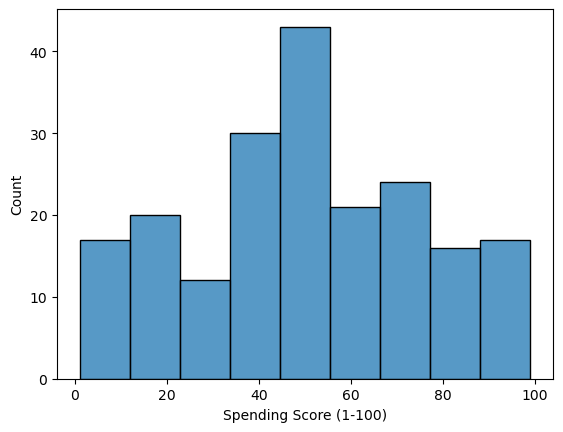

In [172]:
# distribution of spending score
sb.histplot(x='Spending Score (1-100)', data=mall_data_le)
plt.show()

Spending score looks roughly normally distributed.

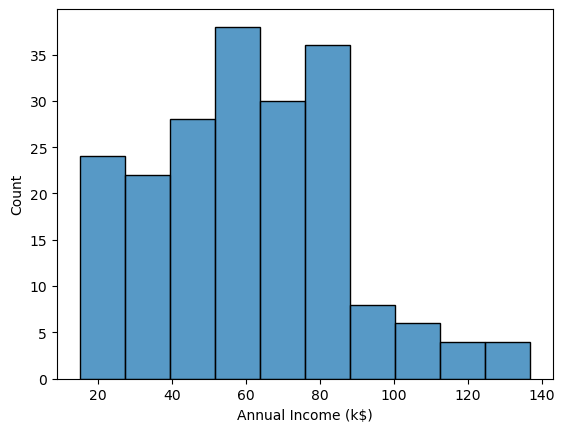

In [173]:
# distribution of annual income
sb.histplot(x='Annual Income (k$)', data=mall_data_le)
plt.show()

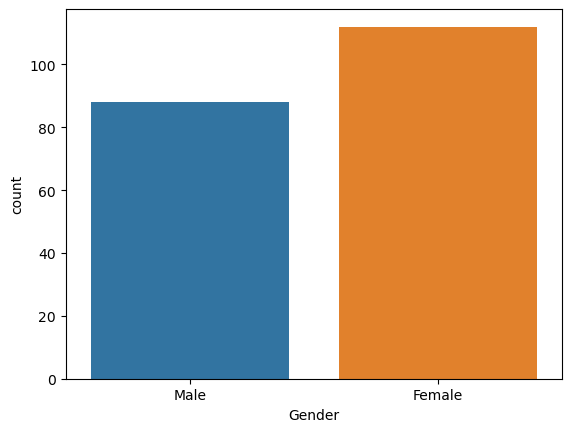

In [174]:
# male and female distribution
sb.countplot(x='Gender', data=mall_data)
plt.show()

Number of female in this dataset is bit more than male. Clustering (K mean, hierarchical) will be apply on the dataset and will test all distance function if possible. As  Annual Income vs Spending Score show there could be 5 different groups and the purpose of this project is to find out customer segments and to better understand customer preferences in each segment.

## K-means clusting
### Elbow and Silhouette score method
* Elbow Method : It plot the sum of squared error for a range of values of k. If this plot looks like an arm, then k the value that resembles an elbow will select. From this elbow value, sum of squared values (inertia) starts decreasing in a linear and considered as an optimal value.<br>
* Silhouette Score Method : It is a method that evaluates the quality of clusters in terms of how well data points are clustered with other data points that are similar to each other. This score is calculated using the distance formula and the k value with highest score is selected for modeling. Silhuette score range between -1 to 1. A score closer to 1 means the data points are well clustered and a score closer to -1 means the data points are not clustered well.<br>

    
Source: https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/

#### Annual income and spending score

c:\Users\tonyw\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


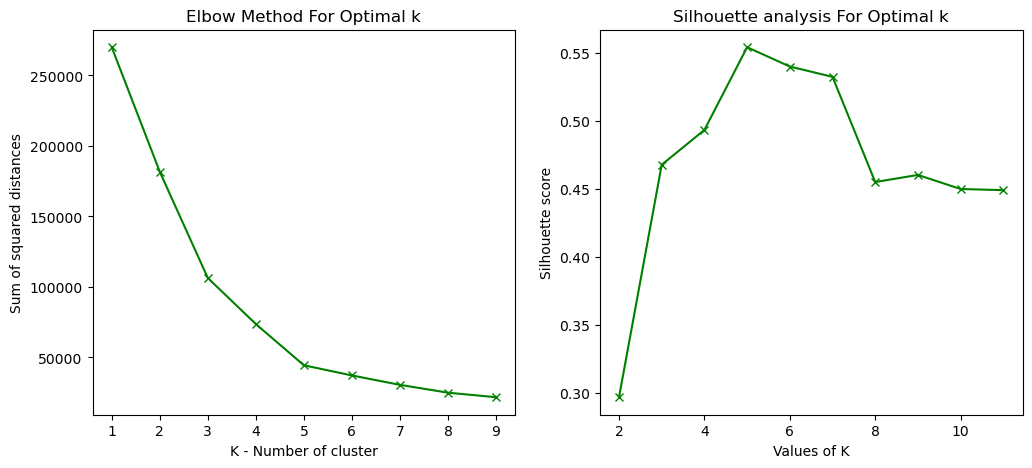

In [175]:
# Consider annual income and spending score
# Elbow method
fig = plt.figure(figsize=(12,5))
fig.add_subplot(1,2,1)
x1 = mall_data_le.iloc[:,[2,3]].values
sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters) 
    kmeans.fit(x1)
    # Inertia: Sum of samples distances to their closest cluster center
    sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K, sum_of_squared_distances,'gx-')
plt.xlabel('K - Number of cluster') 
plt.ylabel('Sum of squared distances') 
plt.title('Elbow Method For Optimal k')

# Silhiouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
silhouette_avg = []
fig.add_subplot(1,2,2)
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(x1)
    cluster_labels = kmeans.labels_
 
    # silhouette score
    silhouette_avg.append(silhouette_score(x1, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'gx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

From the result of elbow and Silhouette score methods **annnual income** and **spending score**, I select: 
- K mean clusters = 5

c:\Users\tonyw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


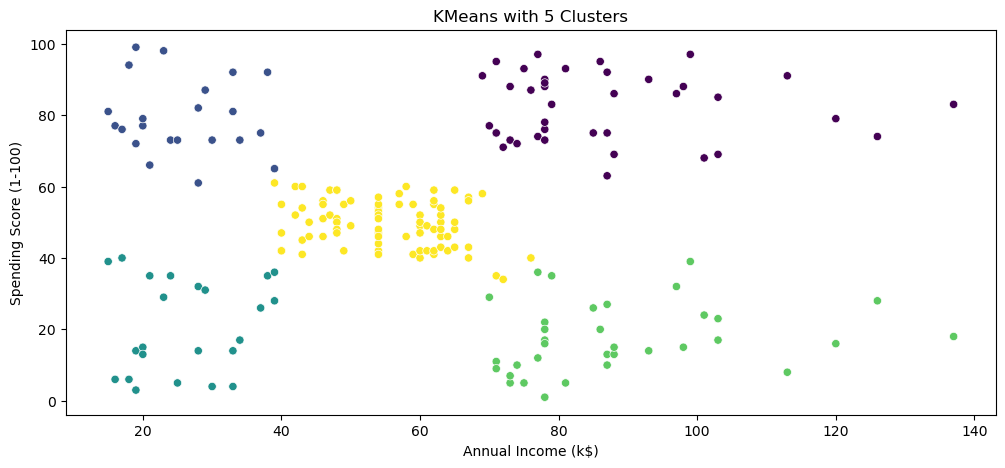

In [176]:
# With 5 Clusters
km1_5 = KMeans(n_clusters=5).fit(x1)

labels = km1_5.labels_

plt.figure(figsize=(12, 5))
sb.scatterplot(mall_data_le['Annual Income (k$)'], mall_data_le['Spending Score (1-100)'], c = labels)
# plt.xlabel('Annual Income (k$)')
# plt.ylabel('Spending Score (1-100)')
plt.title('KMeans with 5 Clusters')
plt.show()

#### Age and Annual income

c:\Users\tonyw\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


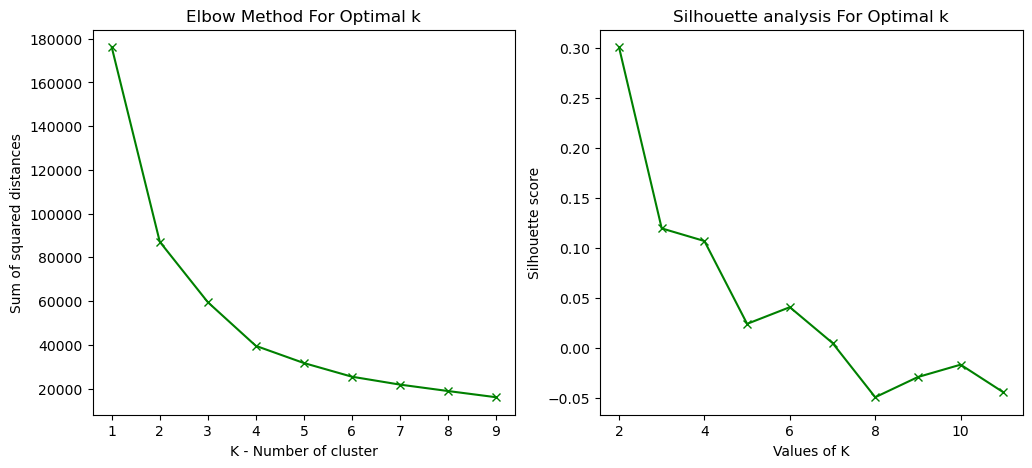

In [177]:
# Elbow method
fig = plt.figure(figsize=(12,5))
fig.add_subplot(1,2,1)
x2 = mall_data_le.iloc[:,[1,2]].values
sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters) 
    kmeans.fit(x2)
    # Inertia: Sum of samples distances to their closest cluster center
    sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K, sum_of_squared_distances,'gx-')
plt.xlabel('K - Number of cluster') 
plt.ylabel('Sum of squared distances') 
plt.title('Elbow Method For Optimal k')

# Silhiouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
silhouette_avg = []
fig.add_subplot(1,2,2)
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(x2)
    cluster_labels = kmeans.labels_
 
    # silhouette score
    silhouette_avg.append(silhouette_score(x1, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'gx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

From the result of elbow and Silhouette score methods **age** and **annual income**, I select: 
- K mean clusters = 2

c:\Users\tonyw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


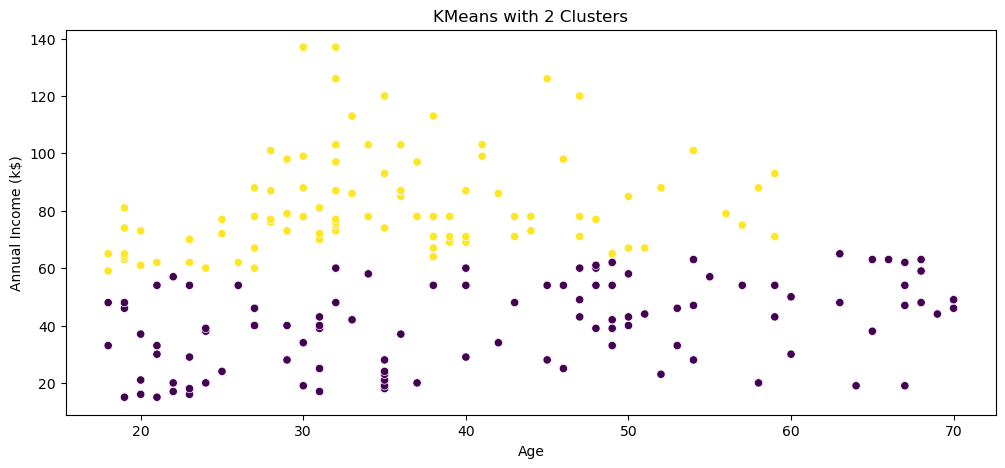

In [178]:
# With 2 Clusters
km2_2 = KMeans(n_clusters=2).fit(x2)

labels = km2_2.labels_

plt.figure(figsize=(12, 5))
sb.scatterplot(mall_data_le['Age'], mall_data_le['Annual Income (k$)'], c = labels)
# plt.xlabel('Annual Income (k$)')
# plt.ylabel('Spending Score (1-100)')
plt.title('KMeans with 2 Clusters')
plt.show()

#### Age and Spending Score

c:\Users\tonyw\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


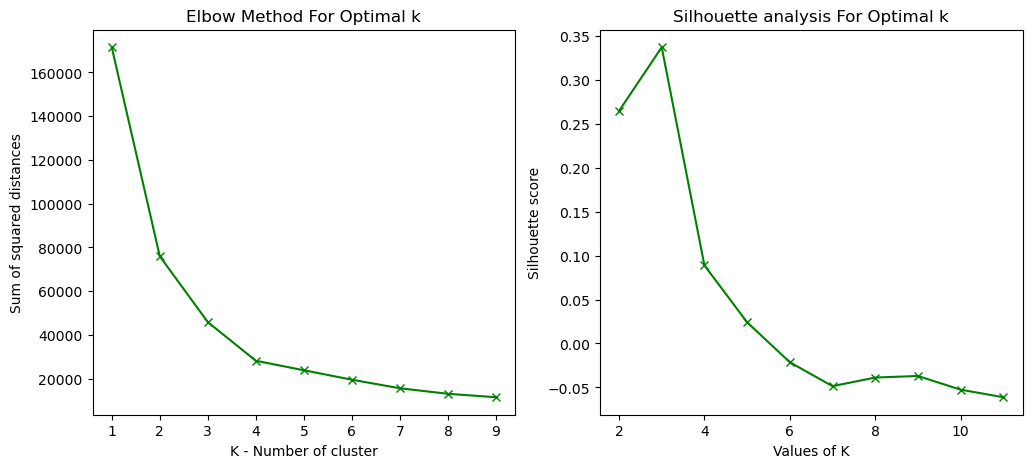

In [179]:
# Elbow method
fig = plt.figure(figsize=(12,5))
fig.add_subplot(1,2,1)
x3 = mall_data_le.iloc[:,[1,3]].values
sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters) 
    kmeans.fit(x3)
    # Inertia: Sum of samples distances to their closest cluster center
    sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K, sum_of_squared_distances,'gx-')
plt.xlabel('K - Number of cluster') 
plt.ylabel('Sum of squared distances') 
plt.title('Elbow Method For Optimal k')

# Silhiouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
silhouette_avg = []
fig.add_subplot(1,2,2)
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(x3)
    cluster_labels = kmeans.labels_
 
    # silhouette score
    silhouette_avg.append(silhouette_score(x1, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'gx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

From the result of elbow and Silhouette score methods **age** and **spending score**, I select: 
- K mean clusters = 3

c:\Users\tonyw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


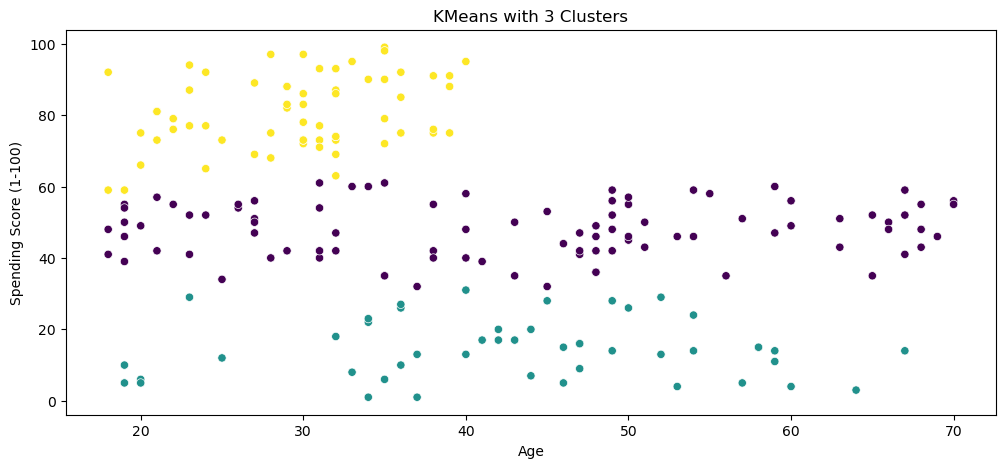

In [180]:
# With 4 Clusters
km3_3 = KMeans(n_clusters=3).fit(x3)

labels = km3_3.labels_

plt.figure(figsize=(12, 5))
sb.scatterplot(mall_data_le['Age'], mall_data_le['Spending Score (1-100)'], c = labels)
# plt.xlabel('Annual Income (k$)')
# plt.ylabel('Spending Score (1-100)')
plt.title('KMeans with 3 Clusters')
plt.show()

### Normailzed data using Elbow and Silhouette score method

#### Normalized Annual income and Spending score

c:\Users\tonyw\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


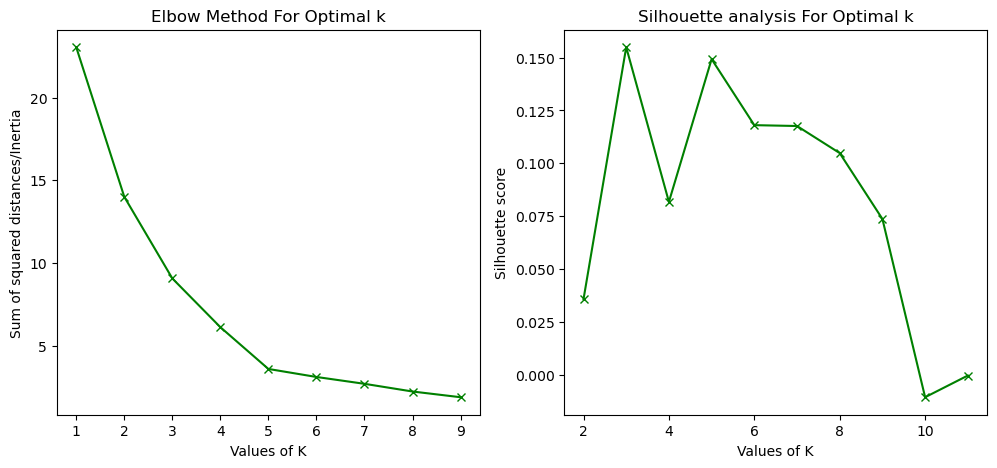

In [181]:
# Consider annual income and spending score
# Elbow method
fig = plt.figure(figsize=(12,5))
fig.add_subplot(1,2,1)
x4 = mall_data_norm.iloc[:,[2,3]].values
sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters) 
    kmeans.fit(x4)
    sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K, sum_of_squared_distances,'gx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')

# Shilouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
silhouette_avg = []
fig.add_subplot(1,2,2)
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(x4)
    cluster_labels = kmeans.labels_
 
    # silhouette score
    silhouette_avg.append(silhouette_score(x2, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'gx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

From the result of elbow and Silhouette score moethds on **annual income** and **spending score**, I select: 
- K mean clusters = 5

c:\Users\tonyw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


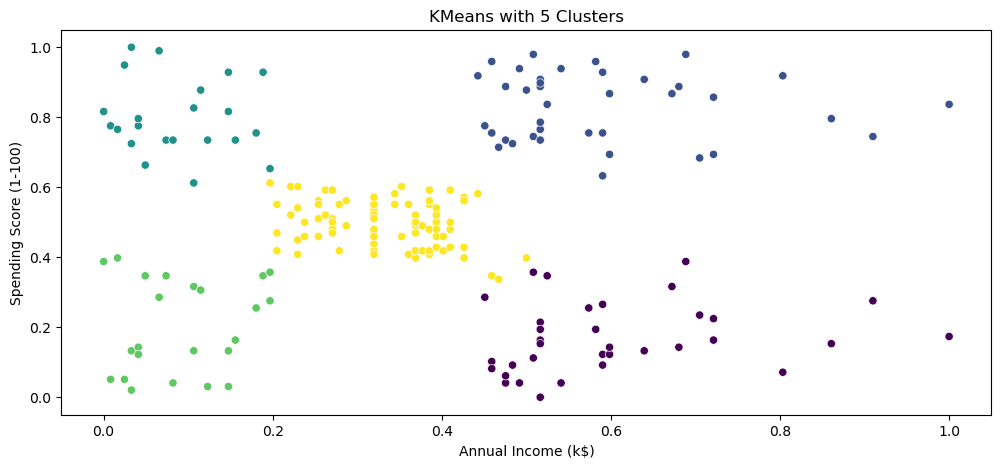

In [182]:
# With 5 Clusters - Normailzed data
km4_5 = KMeans(n_clusters=5).fit(x4)

labels = km4_5.labels_

plt.figure(figsize=(12, 5))
sb.scatterplot(mall_data_norm['Annual Income (k$)'], mall_data_norm['Spending Score (1-100)'], c = labels)
plt.title('KMeans with 5 Clusters')
plt.show()

#### Normalized Age and Annual income

c:\Users\tonyw\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


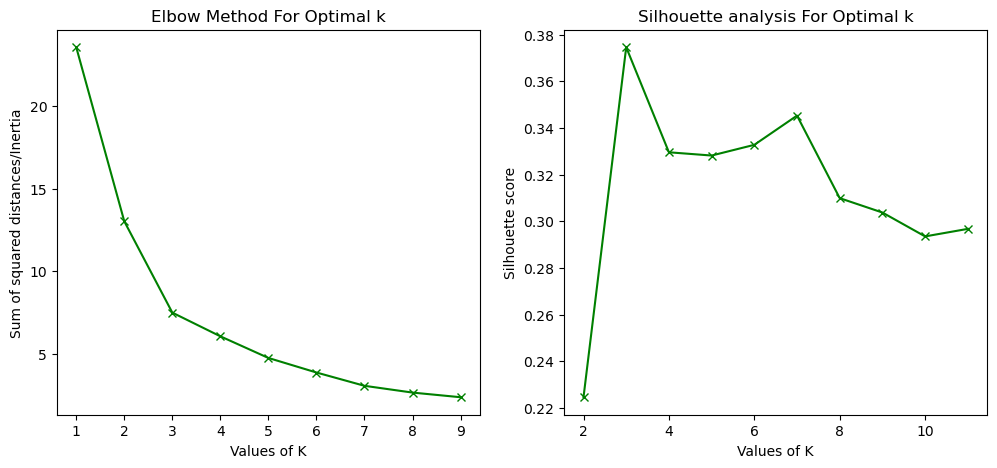

In [183]:
# Consider age and annual income
# Elbow method
fig = plt.figure(figsize=(12,5))
fig.add_subplot(1,2,1)
x5 = mall_data_norm.iloc[:,[1,2]].values
sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters) 
    kmeans.fit(x5)
    sum_of_squared_distances.append(kmeans.inertia_) # Inertia: Sum of samples distances to their closest cluster center
plt.plot(K, sum_of_squared_distances,'gx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')

# Silhiouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
silhouette_avg = []
fig.add_subplot(1,2,2)
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(x5)
    cluster_labels = kmeans.labels_
 
    # silhouette score
    silhouette_avg.append(silhouette_score(x2, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'gx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

From the result of elbow and Silhouette score moethds on **age** and **annual income**, I select: 
- K mean clusters = 3

c:\Users\tonyw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


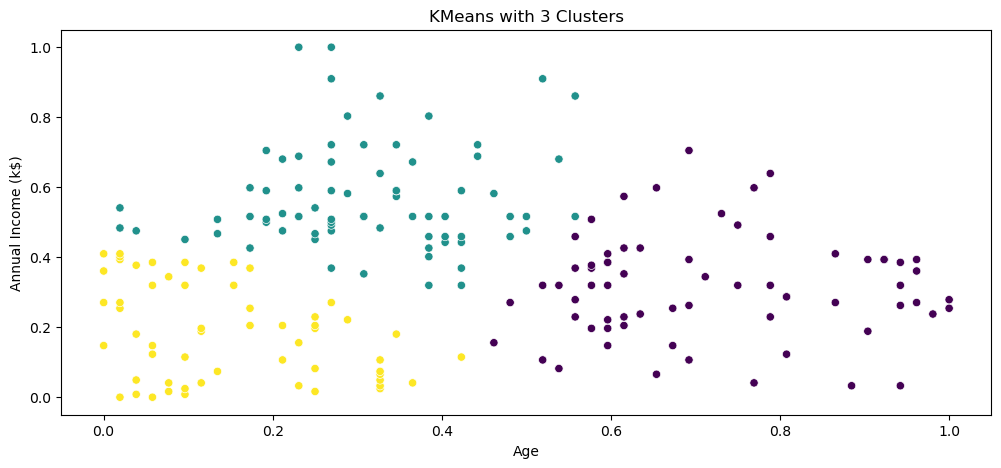

In [184]:
# With 3 Clusters - Normailzed data
km5_3 = KMeans(n_clusters=3).fit(x5)

labels = km5_3.labels_

plt.figure(figsize=(12, 5))
sb.scatterplot(mall_data_norm['Age'], mall_data_norm['Annual Income (k$)'], c = labels)
plt.title('KMeans with 3 Clusters')
plt.show()

#### Normalized Age and Spending Score

c:\Users\tonyw\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


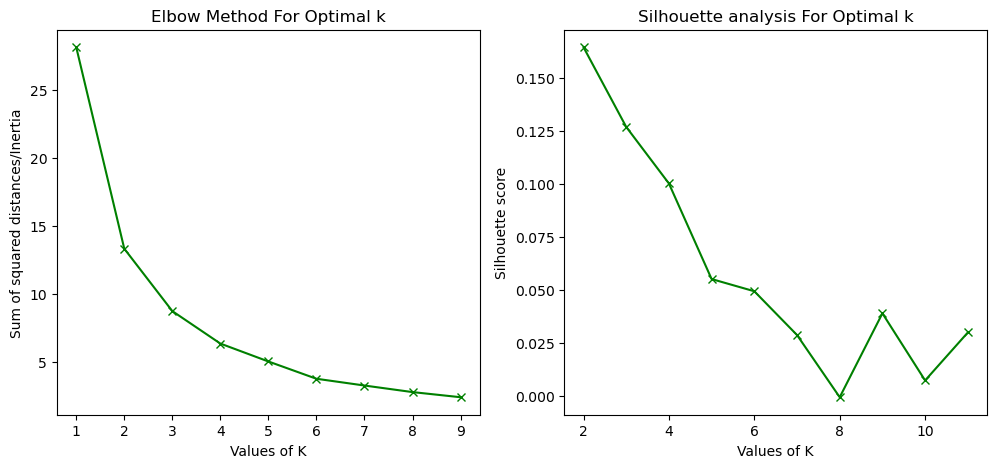

In [185]:
# Consider age and spending score
# Elbow method
fig = plt.figure(figsize=(12,5))
fig.add_subplot(1,2,1)
x6 = mall_data_norm.iloc[:,[1,3]].values
sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters) 
    kmeans.fit(x6)
    sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K, sum_of_squared_distances,'gx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')

# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
silhouette_avg = []
fig.add_subplot(1,2,2)
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(x6)
    cluster_labels = kmeans.labels_
 
    # silhouette score
    silhouette_avg.append(silhouette_score(x2, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'gx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

From the result of elbow and Silhouette score moethds on **age** and **spending score**, I select: 
- K mean clusters = 2

c:\Users\tonyw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


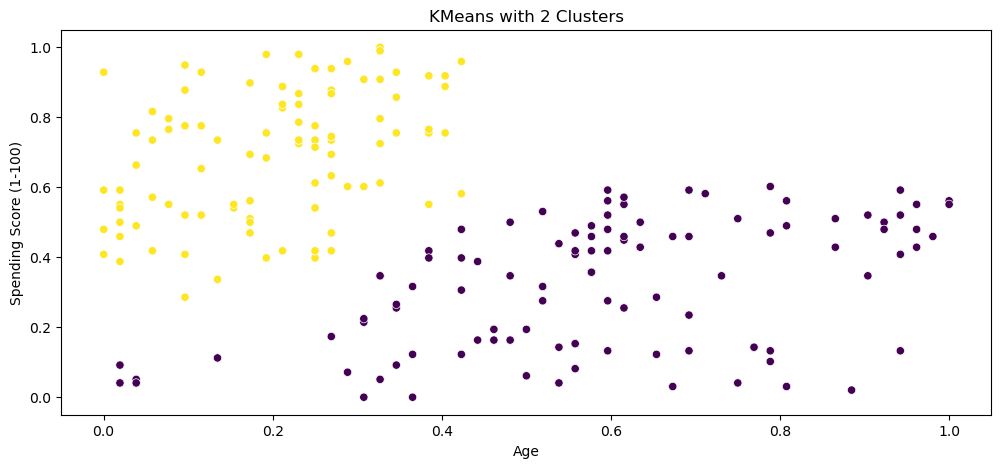

In [186]:
# With 2 Clusters
km6_2 = KMeans(n_clusters=2).fit(x6)

labels = km6_2.labels_

plt.figure(figsize=(12, 5))
sb.scatterplot(mall_data_norm['Age'], mall_data_norm['Spending Score (1-100)'], c = labels)
plt.title('KMeans with 2 Clusters')
plt.show()

### Discussion
| **Original data** | **Number of clusters** | **Clusters group** |
|---|---|---|
| Annual income vs Spending score | 5 | (1) Low income, low spending score<br>(2) Low income,  high spending<br>(3) Mid income, mid spending<br>(4) High income, low spending<br>(5) High income, high spending | 
| Age vs Annual income | 2 | (1) Age below 60 with income greater than 60k<br>(2) Income less than 60k across all age |
| Age vs Spending score  | 3 |(1) Age less than 40 with high spending<br> (2) All age with mid spending<br>(3) All age with low spending<br>Number of medium spending customer |
| **Normalized data** | **Number of clusters** | **Clusters Summary** |
| Annual income vs Spending score | 5 | Same observation as unnormalized data |
| Age vs Annual income | 3 | (1) Young to mid age with low to mide income<br>(2) Young to mid age with mid to high income<br>(3) Mid to old age with low to mid income  |
| Age vs Spending score | 2 | (1) All age with low to mid spending<br>(2) Young to mid age with mid to high spending | 

From Analysis and Visualization section. It was clearly show that **Annual income** and **Spending score** separateed into 5 groups without using <mark>KMean</mark>. But it is difficult to tell income of a customers who enter the mall. It is not recommended to use customers income for marketing promotion. Therefore, we should focus on relationshipe between age and spending score, because people probably don't mind to answer their age or we can even implement a mechine learning model to determine age of customer who enter the mall. Either original or normalization data on **Age** and **Spending score** should work in this case. <br>



## Agglomerative Hierarchical Clustering
Only work on original data, agglomerative clustering consider a data as a single cluster and then merge the most similar cluster together. It is a bottom-up approach. It is a good choice when we don't know how many clusters we want to have. It is also a good choice when we want to see the cluster hierarchy.

c:\Users\tonyw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


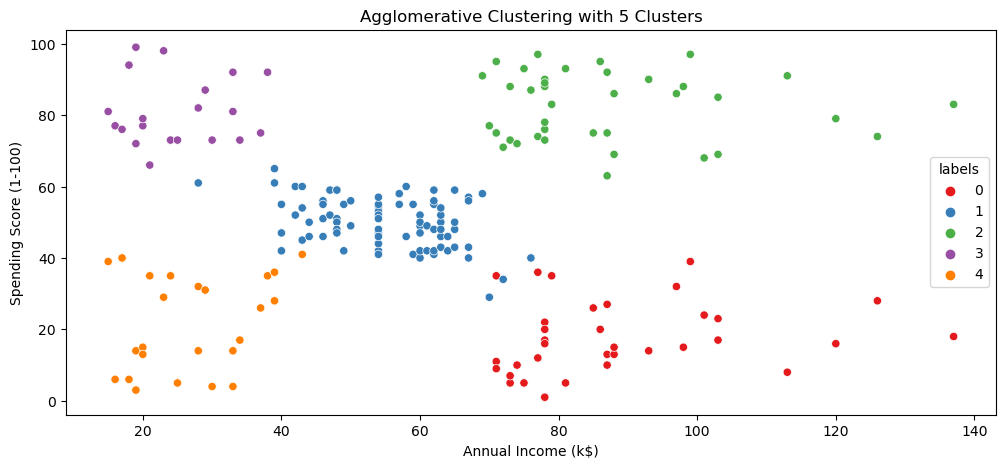

In [187]:
from sklearn.cluster import AgglomerativeClustering

mall_agglom = AgglomerativeClustering(n_clusters = 5, linkage = 'average').fit(mall_data_le)
mall_data_le['labels'] = mall_agglom.labels_
plt.figure(figsize=(12, 5))
sb.scatterplot(mall_data_le['Annual Income (k$)'], mall_data_le['Spending Score (1-100)'], hue= mall_data_le['labels'], palette='Set1')
plt.title('Agglomerative Clustering with 5 Clusters')
plt.show()

c:\Users\tonyw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


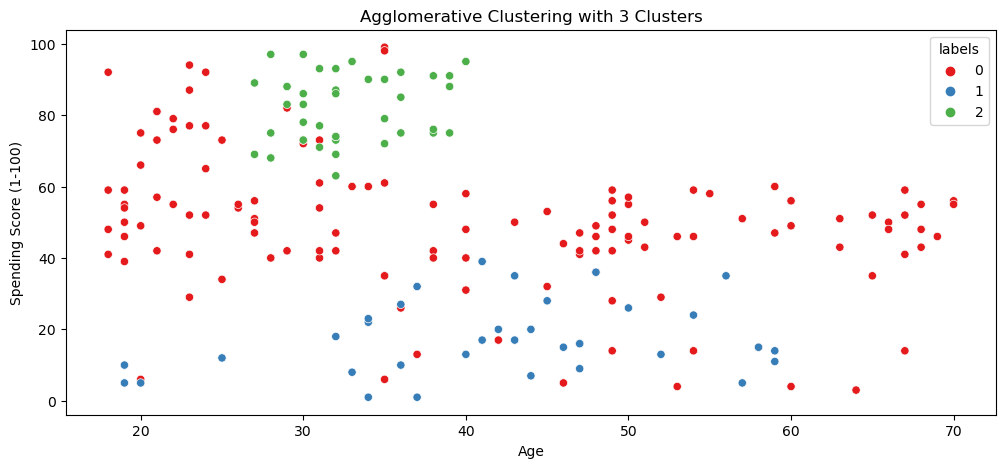

In [188]:
from sklearn.cluster import AgglomerativeClustering

mall_agglom = AgglomerativeClustering(n_clusters = 3, linkage = 'average').fit(mall_data_le)
mall_data_le['labels'] = mall_agglom.labels_
plt.figure(figsize=(12, 5))
sb.scatterplot(mall_data_le['Age'], mall_data_le['Spending Score (1-100)'], hue= mall_data_le['labels'], palette='Set1')
plt.title('Agglomerative Clustering with 3 Clusters')
plt.show()

For comparison purpose, agglomerative clustering on **Annual income** and **Spending score**, **Age** and **Spending score** are differnt from K mean clustering.

## Dimensionality Reduction with PCA

In [189]:
# import PCA from sklearn
from sklearn.decomposition import PCA

In [190]:
# check the dataset
mall_data_le.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),labels
0,1,19,15,39,0
1,1,21,15,81,0
2,0,20,16,6,0
3,0,23,16,77,0
4,0,31,17,40,0


In [191]:
# create a copy and remove labels
mall_data_le_PCA = mall_data_le.copy()
mall_data_le_PCA.drop('labels', axis=1, inplace=True)
mall_data_le_PCA.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [192]:
# fit the PCA model
model_pca = PCA()
model_pca.fit(mall_data_le_PCA)

PCA()

In [193]:
# create explained variance dataframe
explained_variance = []

for i in range(1,5):
    pca = PCA(n_components = i)
    pca.fit(mall_data_le_PCA)
    
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

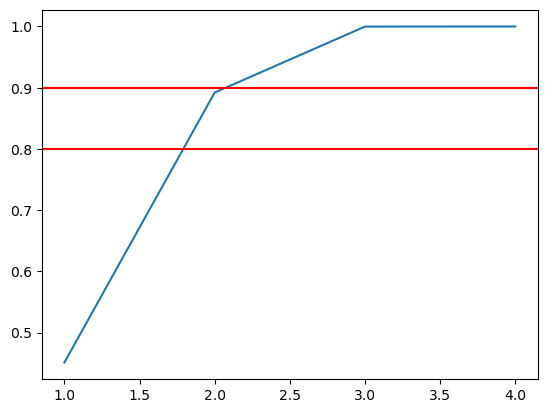

In [194]:
# plot the explained variance
plt.plot(range(1,5), explained_variance)
plt.axhline(0.9, c='r')
plt.axhline(0.8, c='r')

In [195]:
model = PCA(n_components=2)
data_transformed = model.fit_transform(mall_data_le.values)

In [196]:
data_restored = model.inverse_transform(data_transformed)

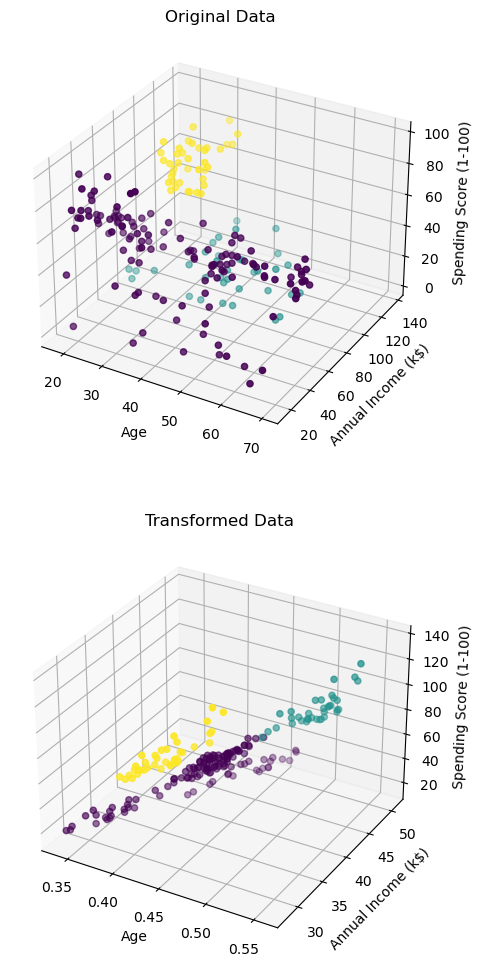

In [200]:
# plot original data and transformed data

fig = plt.figure(figsize=(20, 12))

# original data
ax = plt.subplot(211, projection='3d')
ax.scatter(mall_data_le['Age'], mall_data_le['Annual Income (k$)'], mall_data_le['Spending Score (1-100)'], c=mall_data_le['labels'])
ax.set_title('Original Data')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

# transformed data
ax = plt.subplot(212, projection='3d')
ax.scatter(data_restored[:,0], data_restored[:,1], data_restored[:,2], c=mall_data_le['labels'])
ax.set_title('Transformed Data')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [201]:
reduce_data = PCA(n_components=2).fit_transform(mall_data_le.values)

In [203]:
reduce_data.shape

(200, 2)

c:\Users\tonyw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

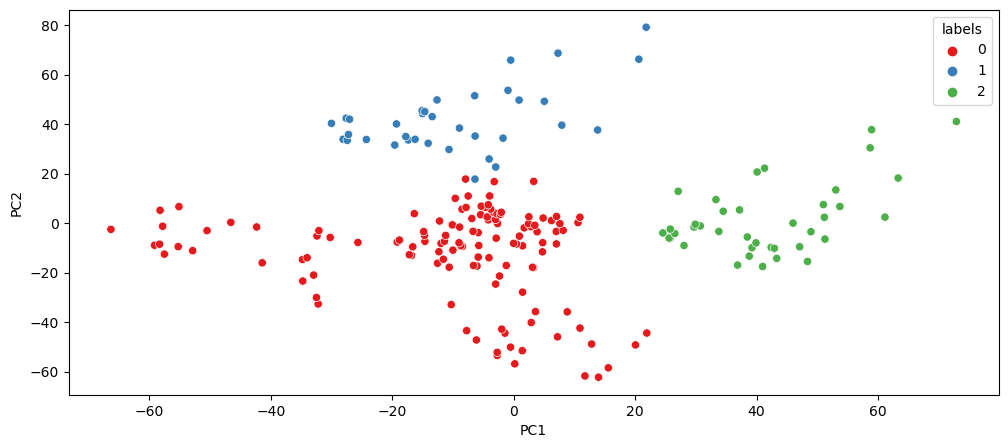

In [204]:
# Visualize the data
reduce_data = pd.DataFrame(reduce_data, columns=['PC1', 'PC2'])
reduce_data['labels'] = mall_data_le['labels']

plt.figure(figsize=(12, 5))
sb.scatterplot(reduce_data['PC1'], reduce_data['PC2'], hue=reduce_data['labels'], palette='Set1')

## Dimensionality Reduction with t-SNE

In [205]:
from sklearn.manifold import TSNE

In [206]:
reduce_data_TSNE = TSNE(n_components=2, random_state=42).fit_transform(mall_data_le.values)

c:\Users\tonyw\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\tonyw\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [207]:
reduce_data_TSNE.shape

(200, 2)

In [208]:
reduce_data_TSNE

array([[  8.211343  ,   1.4273292 ],
       [  6.288562  ,  -5.4262424 ],
       [ 10.442455  ,   2.4272726 ],
       [  6.397239  ,  -4.9958687 ],
       [  8.274071  ,   1.8256435 ],
       [  6.3689127 ,  -4.8442893 ],
       [ 10.56154   ,   3.018627  ],
       [  5.813773  ,  -5.9975915 ],
       [ 10.899732  ,   4.7191324 ],
       [  6.234693  ,  -4.287415  ],
       [ 10.510072  ,   4.9902945 ],
       [  5.6903167 ,  -6.447385  ],
       [ 10.223513  ,   4.6237655 ],
       [  5.8725047 ,  -4.841698  ],
       [ 10.133705  ,   3.0928476 ],
       [  5.8347144 ,  -5.103844  ],
       [  8.459026  ,   2.31875   ],
       [  6.2948704 ,  -3.9324636 ],
       [  9.030792  ,   4.107343  ],
       [  5.4382367 ,  -6.396812  ],
       [  8.390992  ,   2.445276  ],
       [  5.6718793 ,  -4.3289986 ],
       [ 10.617979  ,   3.7132819 ],
       [  5.66244   ,  -4.044766  ],
       [ 10.115407  ,   4.272074  ],
       [  5.232478  ,  -5.0592675 ],
       [  8.494747  ,   3.5317295 ],
 

c:\Users\tonyw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

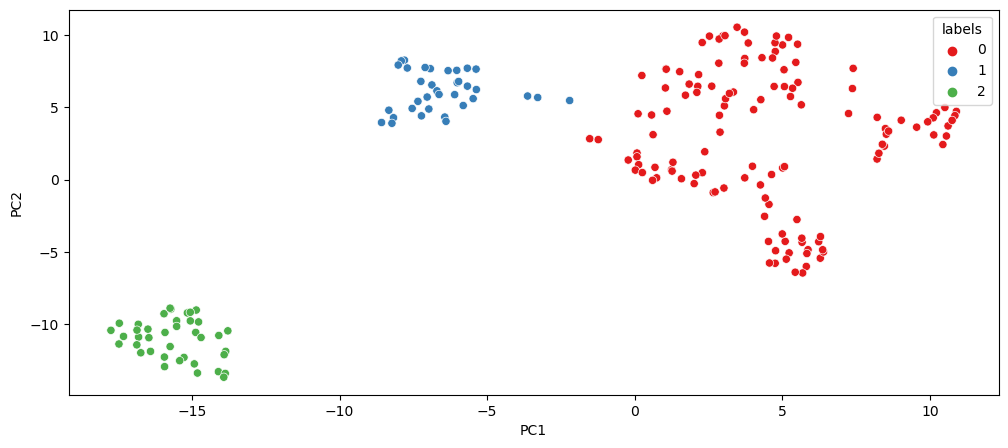

In [209]:
# visualize the data
reduce_data_TSNE = pd.DataFrame(reduce_data_TSNE, columns=['PC1', 'PC2'])
reduce_data_TSNE['labels'] = mall_data_le['labels']

plt.figure(figsize=(12, 5))
sb.scatterplot(reduce_data_TSNE['PC1'], reduce_data_TSNE['PC2'], hue=reduce_data_TSNE['labels'], palette='Set1')

## Plot of 3D graph of Age, Annual Income and Spending Score

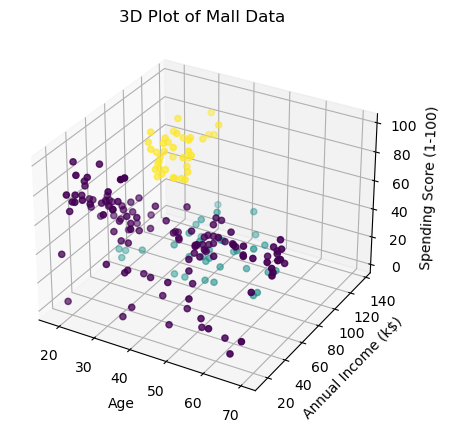

In [198]:
# plot 3D mall_data_le
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mall_data_le['Age'], mall_data_le['Annual Income (k$)'], mall_data_le['Spending Score (1-100)'], c=mall_data_le['labels'])
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('3D Plot of Mall Data')
plt.show()

## Conculusion
Model that I would recomemnd to use is <mark>KMean</mark> with **Age** and **Spending score**. It is easy to implement and easy to understand. It is also easy to explain to the owner of the mall and data can be easily collected from customer who enter the mall by showing them a survey, asking them directly or even using mechine learning model to determine age of customer who enter the mall. Mall owner then can use this information to better understand customer preferences in each segment and use this information to improve their business. Improvement can be in the form of marketing promotion, product placement, etc. to increase low spending score customer to high spending score customer.

## References
https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python<br>
https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/<br>
https://github.com/features/copilot